# 1. 단일 선형 회귀 실습
* 한 개의 입력이 들어가서 한 개의 출력이 나오는 구조


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# 파이썬 코드를 재실행해도 같은 결과가 나올 수 있도록 random 시드를 설정
torch.manual_seed(10)

In [ ]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


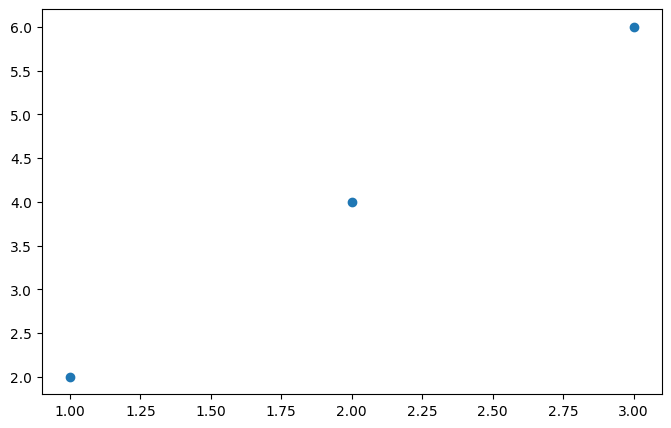

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train)

In [ ]:
# H = Wx + b

model = nn.Linear(1, 1)  # 입력과 출력의 차원을 정의하는 선형 변환을 수행
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [ ]:
# 모델의 학습 가능한 매개변수들을 리스트 형태로 출력
print(list(model.parameters()))  # 임의의 기울기와 bias

[Parameter containing:
tensor([[-0.0838]], requires_grad=True), Parameter containing:
tensor([-0.0343], requires_grad=True)]


In [ ]:
# 비용 함수
# Cost Function = Loss Function
y_pred = model(x_train)
print(y_pred)  # 임의의 기울기와 bias값에 의한 이상한 결과가 나옴

tensor([[-0.1181],
        [-0.2019],
        [-0.2858]], grad_fn=<AddmmBackward0>)


In [ ]:
((y_pred - y_train) ** 2).mean()  # MSE

tensor(20.5513, grad_fn=<MeanBackward0>)

In [ ]:
# MSELoss()(): 주어진 값에 대한 MSE를 구하는 함수
loss = nn.MSELoss()(y_pred, y_train)
loss

tensor(20.5513, grad_fn=<MseLossBackward0>)

In [ ]:
# 데이터 [[1],[2],[3]]
# W : [[-0.0838]], b: [-0.0343]
# pred: [[-0.1181], [-0.2019], [-0.2858]]
print(-0.0838*1 + -0.0343)
print(-0.0838*2 + -0.0343)
print(-0.0838*3 + -0.0343)

-0.1181
-0.2019
-0.2857


# 경사하강법(Gradient Descent)
* 비용 함수의 값을 최소로 하는 W와 b를 찾는 알고리즘을 옵티마이저 알고리즘이라고 함
* 최적화 알고리즘이라고도 함
* 옵티마이저 알고리즘을 통해 W와 b를 찾아내는 과정을 '학습'이라고 부름
* 경사 하강법은 가장 기본적인 옵티마이저 알고리즘

![](https://i.imgur.com/0fW4LTG.png)

In [ ]:
 # SGD(): 옵티마이저 알고리즘 중 하나
 # 학습률(lr): 한 번 움직이는 거리(increment step)
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# loss 계산
loss = nn.MSELoss()(y_pred, y_train)

# gradient를 초기화: 기존의 grad값을 다시 초기화
optimizer.zero_grad()
# 비용함수를 미분하여 gradient(기울기)를 계산
# 역전파: 미분값을 정하고 방향을 찾은 다음에 주어진 lr만큼 이동하면서 얻은 기울기와 절편을 계산
loss.backward()
# W와 b를 업데이트
optimizer.step()

print(list(model.parameters()))

# W : [[-0.0838]], b: [-0.0343]
# W : [[0.1120]], b: [0.0498]

[Parameter containing:
tensor([[0.1120]], requires_grad=True), Parameter containing:
tensor([0.0498], requires_grad=True)]


In [ ]:
# 학습(Training): 반복 훈련을 하면서 틀린 기울기(W)와 bias를 수정하여 오차를 계속 줄여나감
# epochs: 반복 훈련 횟수
epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(x_train)
  loss = nn.MSELoss()(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # 100번마다 프린트
  if epoch % 100 ==0:
    print(f'Epoch: {epoch}/{epochs}  Loss: {loss: 6f}')   # Loss값이 점점 작아짐 - 오차가 작아짐!

Epoch: 0/1000  Loss:  16.260735
Epoch: 100/1000  Loss:  0.048222
Epoch: 200/1000  Loss:  0.029798
Epoch: 300/1000  Loss:  0.018414
Epoch: 400/1000  Loss:  0.011378
Epoch: 500/1000  Loss:  0.007031
Epoch: 600/1000  Loss:  0.004345
Epoch: 700/1000  Loss:  0.002685
Epoch: 800/1000  Loss:  0.001659
Epoch: 900/1000  Loss:  0.001025
Epoch: 1000/1000  Loss:  0.000634


In [ ]:
print(list(model.parameters()))   # 학습된 파라미터
# 결과값y = 1.9708 * x + 0.0663

[Parameter containing:
tensor([[1.9708]], requires_grad=True), Parameter containing:
tensor([0.0663], requires_grad=True)]


In [ ]:
x_test = torch.FloatTensor([[10],[12.1234]])
y_pred = model(x_test)
print(y_pred)

tensor([[19.7747],
        [23.9595]], grad_fn=<AddmmBackward0>)


In [ ]:
1.9708 * 10 + 0.0663

19.7743

In [ ]:
1.9708 * 12.1234 + 0.0663

23.95909672

# 2. 다중 선형 회귀 실습
* 여러개의 입력이 들어가서 한 개의 출력이 나오는 구조


In [3]:
x_train = torch.FloatTensor([[73, 80, 85],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [76, 66, 70]])

y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[ 73.,  80.,  85.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 76.,  66.,  70.]])
torch.Size([5, 3])
tensor([[152.],
        [185.],
        [180.],
        [196.],
        [142.]])
torch.Size([5, 1])


In [4]:
# 가설: H = W1x1 + W2x2 + W3x3 + b
model = nn.Linear(3, 1)  # 3개의 입력과 1개의 출력
print(model)

Linear(in_features=3, out_features=1, bias=True)


In [5]:
print(list(model.parameters()))

# 임의의 W, b
# W: [[-0.2165,  0.1328, -0.3303]]
# b: [-0.1018]

[Parameter containing:
tensor([[0.1582, 0.0974, 0.3038]], requires_grad=True), Parameter containing:
tensor([-0.4549], requires_grad=True)]


In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.000001)  # 3개의 독립변수이기 때문에 lr의 소수점을 더 촘촘히 줌

In [7]:
epochs = 1000
for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss: .6f}')

Epoch 0/0 Loss:  15385.005859
Epoch 100/100 Loss:  12.560049
Epoch 200/200 Loss:  10.894938
Epoch 300/300 Loss:  10.831866
Epoch 400/400 Loss:  10.769468
Epoch 500/500 Loss:  10.707694
Epoch 600/600 Loss:  10.646419
Epoch 700/700 Loss:  10.585634
Epoch 800/800 Loss:  10.525388
Epoch 900/900 Loss:  10.465757
Epoch 1000/1000 Loss:  10.406546


In [8]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.6532, 0.5619, 0.7791]], requires_grad=True), Parameter containing:
tensor([-0.4496], requires_grad=True)]


In [9]:
x_test = torch.FloatTensor([[82, 92, 82]])
y_pred = model(x_test)
print(y_pred)

tensor([[168.6970]], grad_fn=<AddmmBackward0>)


In [11]:
# torch.save(model.state_dict(), 'model.pth')

In [13]:
# import pickle
# with open('model.pkl', 'wb') as f:
#     pickle.dump(model, f)

### 문제
temp.csv 데이터에서 기온에 따른 지면 온도를 예측해보자.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
temp_df = pd.read_csv('/content/drive/MyDrive/KDT/Python/4.머신러닝 딥러닝/temps.csv', encoding='cp949')

In [ ]:
temp_df

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9
...,...,...,...,...,...
8777,232,천안,2020-12-31 19:00,-6.6,-0.6
8778,232,천안,2020-12-31 20:00,-6.4,-0.7
8779,232,천안,2020-12-31 21:00,-7.3,-1.2
8780,232,천안,2020-12-31 22:00,-9.0,-1.5


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        8782 non-null   int64  
 1   지점명       8782 non-null   object 
 2   일시        8782 non-null   object 
 3   기온(°C)    8779 non-null   float64
 4   지면온도(°C)  8782 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 343.2+ KB


In [ ]:
# 컬럼명 변경
temp_df.columns = [['location', 'location_name', 'date', 'temp', 'ground_temp']]

In [ ]:
temp_df

,location,location_name,date,temp,ground_temp
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9
...,...,...,...,...,...
8777,232,천안,2020-12-31 19:00,-6.6,-0.6
8778,232,천안,2020-12-31 20:00,-6.4,-0.7
8779,232,천안,2020-12-31 21:00,-7.3,-1.2
8780,232,천안,2020-12-31 22:00,-9.0,-1.5


In [ ]:
# 결측치 확인
temp_df.isna().sum()

location         0
location_name    0
date             0
temp             3
ground_temp      0
dtype: int64

In [ ]:
# 결측지 제거
temp_df.dropna(inplace=True)

In [ ]:
# 수치형 데이터 정보 확인 - 모델학습에 있어서 이상치 없다고 판단!
temp_df.describe()

,location,temp,ground_temp
count,8779.0,8779.000000,8779.000000
mean,232.0,12.229343,14.093439
std,0.0,10.121243,11.560137
min,232.0,-16.000000,-8.700000
25%,232.0,3.700000,3.400000
50%,232.0,12.600000,14.100000
75%,232.0,21.100000,23.300000
max,232.0,33.800000,51.600000


In [ ]:
x_data = temp_df[['temp']]
y_data = temp_df[['ground_temp']]

x_data = torch.FloatTensor(x_data.values)  # ndarray로 변환: x_data.values
y_data = torch.FloatTensor(y_data.values)

print(x_data.shape)
print(y_data.shape)
# print(x_data.values)

torch.Size([8779, 1])
torch.Size([8779, 1])


In [ ]:
temp_df[['ground_temp']].values

array([[-2.9],
       [-2.4],
       [-2.2],
       ...,
       [-1.2],
       [-1.5],
       [-1.2]])

In [ ]:
import matplotlib.pyplot as plt

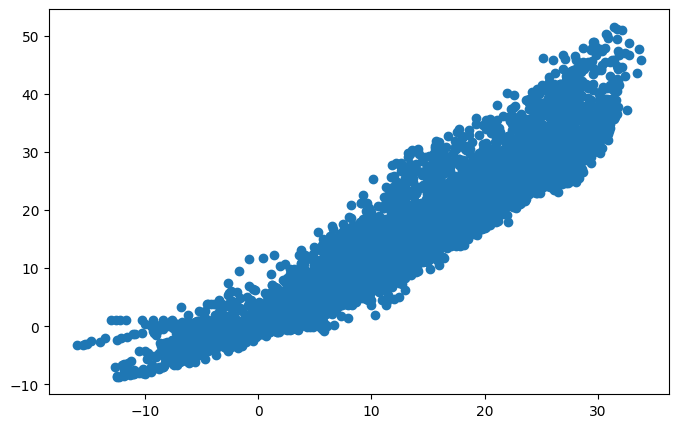

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x_data, y_data)

In [ ]:
model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.7576]], requires_grad=True), Parameter containing:
tensor([-0.9019], requires_grad=True)]


In [ ]:
epochs = 1000

for epoch in range(epochs + 1):
  y_pred = model(x_data)
  loss = nn.MSELoss()(y_pred, y_data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # 100번마다 프린트
  if epoch % 100 ==0:
    print(f'Epoch: {epoch}/{epochs}  Loss: {loss: 6f}')   # Loss값이 점점 작아짐 - 오차가 작아짐!

Epoch: 0/1000  Loss:  949.386780
Epoch: 100/1000  Loss:  13.872856
Epoch: 200/1000  Loss:  13.735575
Epoch: 300/1000  Loss:  13.618855
Epoch: 400/1000  Loss:  13.519619
Epoch: 500/1000  Loss:  13.435250
Epoch: 600/1000  Loss:  13.363518
Epoch: 700/1000  Loss:  13.302530
Epoch: 800/1000  Loss:  13.250678
Epoch: 900/1000  Loss:  13.206594
Epoch: 1000/1000  Loss:  13.169113


In [ ]:
y_pred = model(x_data).detach().numpy()  # 텐서를 numpy 배열로 변환
y_pred

array([[ -9.651394],
       [ -8.082669],
       [ -7.410358],
       ...,
       [ -8.082669],
       [ -9.987549],
       [-10.211653]], dtype=float32)

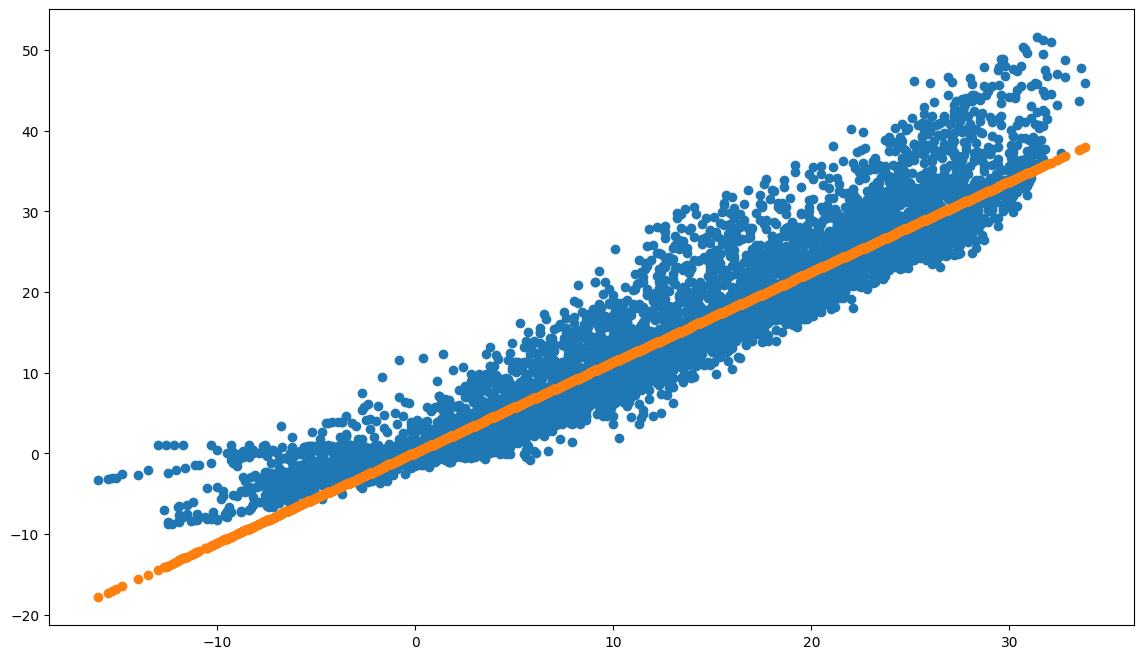

In [ ]:
plt.figure(figsize=(14, 8))
plt.scatter(x_data, y_data)
plt.scatter(x_data, y_pred)